# Resolved fractions
This script calculates the fraction of total Galactic-Center Excess (GCE) emission that should be in resolved pulsar candidates, given the efficiency function.

**Note** for the parameters corresponding to *this work* the bulge population is less bright than the GCE.

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append("../likelihood/")

import PSR_flux as flux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Population parameters and general settings

In [15]:
# --- Settings --- #
Ns = 100 # Number of s bins in s integration
Nang = 10 # Number of angular bins in angular integration
theta_mask = 2.0 #degrees

rcut = 3.0 #kpc

# --- Ajello+ 2017 --- #
beta_Fermi = 1.25
Nbulge_Fermi = 1370
Lmin_Fermi = 1e31 # erg/s [0.3-500 GeV]
Lmax_Fermi = 1e36
alpha_fermi = 2.57

# --- Bartels, Krishnamurthy & Weniger (2015) --- #
beta_BKW = 1.5
Nbulge_BKW = 3532.
Lmin_BKW = 7.33e32 # erg/s [0.3-500 GeV]
Lmax_BKW = 6.65e34 # erg/s [0.3-500 GeV]
alpha_BKW = 2.5

# --- This work --- #
beta_tw = 2.11
Nbulge_tw = 8.3e5
Lmin_tw =  1e31 # erg/s [0.3-500 GeV]
Lmax_tw = 1e36
alpha_tw = 2.78


## Load efficiency

In [16]:
omega_ijk = np.load("../data/omega_ijk_int.npy") # axes: 0=l, 1=b, 2=flux




----------------------------------------


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


 Luminosity function from: Ajello+ 2017
----------------------------------------


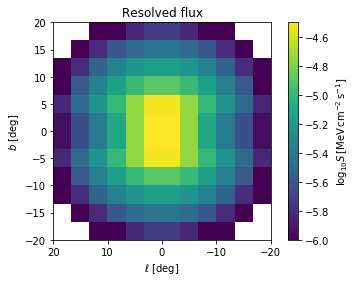

Total GCE emission: 1.18e-03 MeV/cm2/s
Resolved GCE emission: 8.58e-04 MeV/cm2/s
Fraction of GCE in resolved pulsar-like sources: 0.727



----------------------------------------
 Luminosity function from: BKW (2015)
----------------------------------------


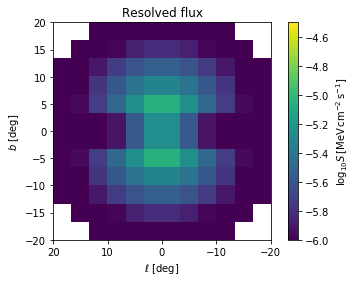

Total GCE emission: 6.93e-04 MeV/cm2/s
Resolved GCE emission: 2.44e-04 MeV/cm2/s
Fraction of GCE in resolved pulsar-like sources: 0.352



----------------------------------------
 Luminosity function from: This work
----------------------------------------


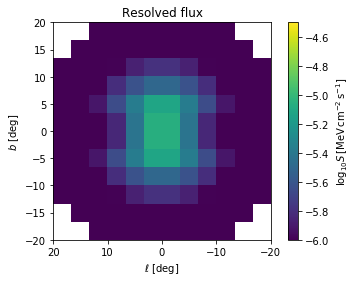

Total GCE emission: 3.71e-04 MeV/cm2/s
Resolved GCE emission: 1.96e-04 MeV/cm2/s
Fraction of GCE in resolved pulsar-like sources: 0.527


In [17]:
sh = np.array(omega_ijk.shape)

for N_stars, beta, Lmin, Lmax, alpha, name in [[Nbulge_Fermi, beta_Fermi, Lmin_Fermi, Lmax_Fermi, alpha_BKW, 'Ajello+ 2017'],
                                               [Nbulge_BKW, beta_BKW, Lmin_BKW, Lmax_BKW, alpha_BKW, 'BKW (2015)'],
                                               [Nbulge_tw, beta_tw, Lmin_tw, Lmax_tw, alpha_tw, 'This work']]:
    print "\n\n\n----------------------------------------"
    print " Luminosity function from: %s"%name
    print "----------------------------------------"

    S_bulge = np.array([[[
        flux.Fbulge_ijk(i,j,k,N_stars,omega_ijk[i,j,k],alpha,beta,rcut,Lmin,Lmax,Ns,Nang,theta_mask) 
            for k in range(sh[2])]
            for j in range(sh[1])]
            for i in range(sh[0])])
    S_bulge_tot = np.array([[[
        flux.Fbulge_ijk(i,j,k,N_stars, 1.,alpha,beta,rcut,Lmin,Lmax,Ns,Nang,theta_mask) 
            for k in range(sh[2])]
            for j in range(sh[1])]
            for i in range(sh[0])])

    plt.title('Resolved flux')
    plt.imshow(np.log10(S_bulge.sum(axis=2).T), extent=[20, -20, -20, 20], vmax=-4.5, vmin=-6)
    plt.colorbar(label=r'$\log_{10}S\mathrm{\,[MeV\,cm^{-2}\,s^{-1}]}$')
    plt.xlabel(r'$\ell$ [deg]')
    plt.ylabel(r'$b$ [deg]')
    plt.show()
    # plt.imshow(S_bulge_tot.sum(axis=2).T)
    # plt.show()
    print "Total GCE emission: %.2e MeV/cm2/s"%(S_bulge_tot.sum())
    print "Resolved GCE emission: %.2e MeV/cm2/s"%(S_bulge.sum())
    print "Fraction of GCE in resolved pulsar-like sources: %.3f"%(S_bulge.sum()/S_bulge_tot.sum())

